In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Problema 1
Vamos praticar gerar matrizes e fazer operações com as linhas e colunas:

(a) Crie uma matriz A com as dimensões (5, 4) e elementos aleatórios variando entre 0 e 50, com o 50 incluso;

__Dica:__ Utilize as funções `np.random.randint` e `np.reshape`

(b) Retorne a média do vetor

(c) Retorne os menores valores de cada coluna;

(d) Retorne os maiores valores de cada linha.

In [20]:
# a) Crie uma matriz A com as dimensões (5, 4) e elementos aleatórios variando entre 0 e 50, com o 50 incluso;
vetor = np.random.randint(low = 0, high = 51, size = 20).reshape(5, 4)
vetor

array([[18, 15, 19, 31],
       [37, 50, 31, 22],
       [50, 46,  8,  1],
       [ 7, 17, 22, 47],
       [25, 31,  2, 21]])

In [21]:
# b) Retorne a média do vetor
vetor.mean()

25.0

In [101]:
# c) Retorne os menores valores de cada coluna;
vetor.min(axis = 0)

array([ 7, 15,  2,  1])

In [102]:
# d) Retorne os maiores valores de cada linha.
vetor.max(axis = 1)

array([31, 50, 50, 47, 31])

### Problema 2

Crie um objeto DataFrame que contenha os dados da tabela abaixo, os quais se referem ao peso, altura e idade de cinco pessoas:


| Peso (kg) | Altura (cm) | Idade (anos) |
|-----------|-------------|--------------|
|  47 | 161	| 31 |
|  80 | 170	| 21 |
|  60 | 175	| 16 |
|  90 | 162	| 28 |
| 100 | 185	| 23 |
| 147 | 189 | 32 |

Com base no DataFrame criado, realize o que for pedido nos itens abaixo:

(a) Visualize apenas os dados da coluna que contém a altura das pessoas;

(b) Obtenha a idade média das pessoas;

(c) Obtenha os dados das pessoas que estão abaixo da altura média;

(d) Crie um nova coluna no DataFrame que contenha o IMC (Índice de Massa Corporal) de cada pessoa;

__Obs.:__ A fórmula para o IMC é dada por IMC = Peso/(Altura)² com o peso em kg e a altura em metros.

(e) Remova a coluna que contém a idade das pessoas;

(f) Crie uma nova coluna chamada Classificação, que contenha a classificação de cada indivíduo, de acordo com o seu IMC. Para isso, consulte a tabela abaixo.

| IMC             | Classificação |
|-----------------|---------------|
Menor que 18,5    | Subpeso |
Entre 18,5 e 24,9 | Normal |
Entre 25,0 e 29,9 | Sobrepeso |
Entre 30,0 e 39,9 | Obesidade Grau I |
Maior que 40,0    | Obesidade Grau II |

(g) Salve esses dados do DataFrame em um arquivo csv.

In [3]:
# Copiando o dataframe
df = pd.read_clipboard()
df

,Peso (kg),Altura (cm),Idade (anos)
0,47,161,31
1,80,170,21
2,60,175,16
3,90,162,28
4,100,185,23
5,147,189,32


In [4]:
# a) Visualize apenas os dados da coluna que contém a altura das pessoas
df[["Altura (cm)"]]

,Altura (cm)
0,161
1,170
2,175
3,162
4,185
5,189


In [5]:
# b) Obtenha a idade média das pessoas
df["Idade (anos)"].mean()

25.166666666666668

In [6]:
# c) Obtenha os dados das pessoas que estão abaixo da altura média
df[df["Altura (cm)"] < df["Altura (cm)"].mean()]

,Peso (kg),Altura (cm),Idade (anos)
0,47,161,31
1,80,170,21
3,90,162,28


In [7]:
# d) Crie um nova coluna no DataFrame que contenha o IMC (Índice de Massa Corporal) de cada pessoa
df["IMC"] = df["Peso (kg)"]/((df["Altura (cm)"]/100)**2)
df

,Peso (kg),Altura (cm),Idade (anos),IMC
0,47,161,31,18.13
1,80,170,21,27.68
2,60,175,16,19.59
3,90,162,28,34.29
4,100,185,23,29.22
5,147,189,32,41.15


In [8]:
# e) Remova a coluna que contém a idade das pessoas
df.drop("Idade (anos)", axis = 1)

,Peso (kg),Altura (cm),IMC
0,47,161,18.13
1,80,170,27.68
2,60,175,19.59
3,90,162,34.29
4,100,185,29.22
5,147,189,41.15


In [11]:
# f) Crie uma nova coluna chamada Classificação, que contenha a classificação de cada indivíduo, de acordo com o seu IMC.
df["Classificação"] = pd.cut(df["IMC"], 
                             bins = [0,18.5,24.9,29.9,39.9,np.inf], 
                             labels = ["Subpeso", "Normal", "Sobrepeso", "Obesidade Grau I", "Obesidade Grau II"])

In [12]:
df

,Peso (kg),Altura (cm),Idade (anos),IMC,Classificação
0,47,161,31,18.13,Subpeso
1,80,170,21,27.68,Sobrepeso
2,60,175,16,19.59,Normal
3,90,162,28,34.29,Obesidade Grau I
4,100,185,23,29.22,Sobrepeso
5,147,189,32,41.15,Obesidade Grau II


In [68]:
# g) Salve esses dados do DataFrame em um arquivo csv
df.to_csv("df_IMC.csv")

### Problema 3

O arquivo avocado.xlsx consiste em um dataset que contém dados sobre vendas de abacates  em diversas regiões dos Estados Unidos. Essa dataset contém as seguintes colunas:

| Coluna | Descrição |
|--------|-----------|
| Date | data da observação |
| AveragePrice | preço médio de um único abacate |
| year | ano |
| region | cidade ou região da observação |
| Total Volume | volume total de abacates vendidos |

Além das informações acima, contidas no arquivo avocado.xlsx, o tipo do abacate (convencional ou orgânico) também seria uma informação importante para a sua análise. Suponhamos que você conseguiu essas informações para cada uma das observações do arquivo avocado.csv, na mesma ordem, e salvou-as no arquivo avocado_type.xlsx. Portanto, tudo o que você precisa é juntar esses dois arquivos em um mesmo DataFrame.

Com o DataFrame criado, obtenha o que é solicitado nos itens elencados abaixo:




In [13]:
avocado = pd.read_csv("./data/avocado.csv", sep = ";")
avocado_type = pd.read_excel("./data/avocado_type.xlsx")

avocado["type"] = avocado_type

In [14]:
# todas as tabelas numa só
avocado

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,"64,236.62",2015,Albany,orgânico
1,2015-12-20,1.35,"54,876.98",2015,Albany,convencional
2,2015-12-13,0.93,"118,220.22",2015,Albany,convencional
3,2015-12-06,1.08,"78,992.15",2015,Albany,orgânico
4,2015-11-29,1.28,"51,039.60",2015,Albany,orgânico
...,...,...,...,...,...,...
18244,2018-02-04,1.63,"17,074.83",2018,WestTexNewMexico,convencional
18245,2018-01-28,1.71,"13,888.04",2018,WestTexNewMexico,convencional
18246,2018-01-21,1.87,"13,766.76",2018,WestTexNewMexico,convencional
18247,2018-01-14,1.93,"16,205.22",2018,WestTexNewMexico,convencional


(a) A quantidade de abacates do tipo convecional e do tipo orgânico.

In [18]:
print("convencional :", avocado[avocado["type"] == "convencional"].value_counts().sum())
print("orgânico :", avocado[avocado["type"] == "orgânico"].value_counts().sum())

convencional : 9114
orgânico : 9135



(b) A quantidade de registros (linhas) de abacates vendidos para cada região ordenada da maior venda para a menor.

In [19]:
# maior venda, nesse caso, consideramos o maior AveragePrice
avocado.groupby("region").sum().sort_values(by="AveragePrice", ascending=False)

,AveragePrice,Total Volume,year
region,,,
HartfordSpringfield,614.70,"50,670,537.46",681458
SanFrancisco,609.82,"135,830,191.78",681458
NewYork,583.92,"240,734,127.53",681458
Philadelphia,551.66,"71,838,798.18",681458
Sacramento,548.09,"75,163,746.86",681458
Charlotte,542.84,"35,555,544.42",681458
Northeast,541.45,"713,280,909.56",681458
Albany,527.63,"16,067,799.97",681458
Chicago,526.19,"133,702,338.51",681458


(c) Para que todos os labels das colunas fiquem padronizados, renomeie aqueles que estão iniciando em letra minúscula para que iniciem em letra maiúscula, trocando espaço por _ e adicionando _ como separação de texto.

In [20]:
avocado.columns.str.replace(" ", "_").str.capitalize()

Index(['Date', 'Averageprice', 'Total_volume', 'Year', 'Region', 'Type'], dtype='object')

In [28]:
avocado.columns = avocado.columns.str.replace(" ", "_").str.capitalize()
avocado.rename({"Averageprice": "Average_price"}, axis = 1, inplace = True)

In [30]:
avocado.head()

,Date,Average_price,Total_volume,Year,Region,Type
0,2015-12-27,1.33,"64,236.62",2015,Albany,orgânico
1,2015-12-20,1.35,"54,876.98",2015,Albany,convencional
2,2015-12-13,0.93,"118,220.22",2015,Albany,convencional
3,2015-12-06,1.08,"78,992.15",2015,Albany,orgânico
4,2015-11-29,1.28,"51,039.60",2015,Albany,orgânico


(d) Essa dado possui duplicados? Se sim, remova-os do dataset.

In [8]:
avocado.duplicated().sum()
# Sem duplicados

0

(e) Retire dos dados a região 'TotalUS'

In [33]:
avocado.drop(avocado[avocado["Region"] == "TotalUS"].index, inplace = True)

In [34]:
avocado[avocado["Region"] == "TotalUS"]

,Date,Average_price,Total_volume,Year,Region,Type


(f) Apresente as regiões que mais venderam abacate em todo o período em ordem decrescente.

In [35]:
avocado.groupby("Region").sum().sort_values(by="Total_volume", ascending=False)

,Average_price,Total_volume,Year
Region,,,
West,430.01,"1,086,779,155.75",681458
California,471.62,"1,028,981,653.17",681458
SouthCentral,372.22,"1,011,279,618.83",681458
Northeast,541.45,"713,280,909.56",681458
Southeast,472.53,"615,238,409.11",681458
GreatLakes,452.43,"589,642,549.29",681458
Midsouth,474.81,"508,349,357.20",681458
LosAngeles,411.01,"507,896,547.63",681458
Plains,485.54,"311,188,529.11",681458


(h) Calcule o volume total de abacates vendidos para cada tipo e ano.

In [36]:
avocado.groupby(["Type", "Year"])[["Total_volume"]].sum()

Total_volume
Type         Year                 
convencional 2015 1,405,835,526.60
             2016 1,538,913,526.12
             2017 1,505,463,914.14
             2018   433,710,441.83
orgânico     2015 1,322,377,914.02
             2016 1,462,817,222.93
             2017 1,564,148,221.75
             2018   425,395,644.21

(f) existe alguma região que foi a maior responsável pela queda na produção de 2018?

In [37]:
avocado_18 = avocado[avocado["Year"] == 2018]
avocado_18.groupby("Region")[['Total_volume']].sum().sort_values(by= "Total_volume").head(1)

# Região de Syracuse teve uma produção de 1,046,987.66

,Total_volume
Region,
Syracuse,"1,046,987.66"


(g) Qual cidade menos faturou com a venda de abacates?

In [38]:
avocado["Faturamento"] = avocado["Average_price"] * avocado["Total_volume"]
avocado.groupby("Region")[["Faturamento"]].sum().sort_values(by = "Faturamento", ascending = True).head(1)

,Faturamento
Region,
Syracuse,"15,205,192.60"


### Problema 4

Com base no dataset 'Video_Games_Sales.csv' responda:


In [39]:
game_sale = pd.read_csv("./data/Video_Games_Sales.csv", sep = ";")
game_sale.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,"2,006.00",Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8.00,322.00,Nintendo,E
1,Super Mario Bros.,NES,"1,985.00",Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.30,709.00,Nintendo,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8.00,192.00,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN



(a) Quantos jogos existem em cada genero?


In [19]:
game_sale.groupby("Genre")[["Genre"]].count()

,Genre
Genre,
Action,3370
Adventure,1303
Fighting,849
Misc,1750
Platform,888
Puzzle,580
Racing,1249
Role-Playing,1500
Shooter,1323


(b) Temos duplicados nesses dados? E nulos?

In [20]:
game_sale.duplicated().sum()
# Sem duplicados

0

In [50]:
print("Valores nulos para cada feature:\n", game_sale.isnull().sum())
print("Total de valores nulos: ", game_sale.isnull().sum().sum())

Valores nulos para cada feature:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
Total de valores nulos:  49141


(b) Quantos jogos de cada publisher receberam nota acima de 9 na avaliação dos usuarios?

In [51]:
game_sale_9 = game_sale[game_sale["User_Score"] > 9]
game_sale_9

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
65,Final Fantasy VII,PS,"1,997.00",Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.00,20.00,9.20,"1,282.00",SquareSoft,T
97,Super Mario Galaxy 2,Wii,"2,010.00",Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.00,87.00,9.10,"1,854.00",Nintendo EAD Tokyo,E
106,Tekken 3,PS,"1,998.00",Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.00,15.00,9.10,367.00,Namco,T
110,Mario Kart 8,WiiU,"2,014.00",Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.00,82.00,9.10,"1,599.00",Nintendo,E
111,Super Smash Bros. Melee,GC,"2,001.00",Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,92.00,38.00,9.10,568.00,HAL Labs,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16230,Monster Rancher Advance 2,GBA,"2,002.00",Simulation,Tecmo Koei,0.01,0.00,0.00,0.00,0.01,79.00,5.00,9.40,9.00,"Tecmo, Graphic Research",E
16355,Deus Ex,PC,"2,000.00",Role-Playing,Eidos Interactive,0.00,0.01,0.00,0.00,0.01,90.00,28.00,9.30,"1,069.00",Ion Storm,M
16433,Greg Hastings' Tournament Paintball Max'd,PS2,"2,006.00",Shooter,Activision,0.01,0.00,0.00,0.00,0.01,70.00,8.00,9.20,32.00,Activision Value,E10+
16550,Wade Hixton's Counter Punch,GBA,"2,004.00",Sports,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01,78.00,13.00,9.50,4.00,Inferno Games,T


In [23]:
game_sale_9.groupby("Publisher")[["User_Score"]].count().sort_values(by = "User_Score", ascending = False)

,User_Score
Publisher,
Nintendo,20
Electronic Arts,19
Activision,16
Konami Digital Entertainment,10
THQ,10
Tecmo Koei,9
Capcom,9
Vivendi Games,8
Atari,7



(c) Faça uma tabela que mostre o total vendido por ano por pais/globalmente de cada publisher? Você consegue observar algum padrão? Com se comportaram as vendas na América do Norte (NA) ao longo do tempo? O mesmo foi visto nos demais lugares? 


In [52]:
# Venda de jogos por ano por país/global
game_year = game_sale.groupby(["Year_of_Release"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
game_publisher = game_sale.groupby(["Publisher"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()

In [53]:
game_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
"1,980.00",10.59,0.67,0.00,0.12,11.38
"1,981.00",33.40,1.96,0.00,0.32,35.77
"1,982.00",26.92,1.65,0.00,0.31,28.86
"1,983.00",7.76,0.80,8.10,0.14,16.79
"1,984.00",33.28,2.10,14.27,0.70,50.36
"1,985.00",33.73,4.74,14.56,0.92,53.94
"1,986.00",12.50,2.84,19.81,1.93,37.07
"1,987.00",8.46,1.41,11.63,0.20,21.74
"1,988.00",23.87,6.59,15.76,0.99,47.22


In [27]:
import matplotlib.pyplot as plt

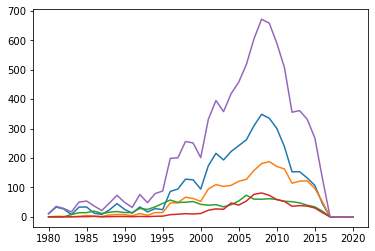

In [28]:
plt.plot(game_year)
plt.show()

# Vendas na América do Norte (Azul) teve uma escalada em vendas a partir de 1995 com pico entre 2005 e 2010 e uma queda
# acentuada até 2020. O resto do mundo seguiu o mesmo padrão.
# Roxo = Global
# Azul = NA
# Laranja = Europa
# Verde = Japão
# Vermelho - Outros

In [29]:
game_publisher

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.01,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...
id Software,0.02,0.00,0.00,0.00,0.03
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,0.03,0.06,0.00,0.01,0.10


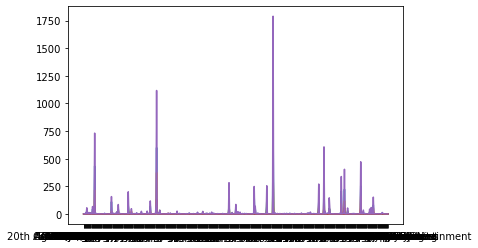

In [30]:
plt.plot(game_publisher)
plt.show()

# Não é possível observar uma pdrão entre Publisher e vendas


(d) Qual foi jogo mais vendido na união européia? De que ano ele é e qual a editora?


In [221]:
print(game_sale.sort_values(by = "EU_Sales", ascending = False).loc[0, "Name"])
print(game_sale.sort_values(by = "EU_Sales", ascending = False).loc[0, "Year_of_Release"])
print(game_sale.sort_values(by = "EU_Sales", ascending = False).loc[0, "Publisher"])

Wii Sports
2006.0
Nintendo



(e) Quantos % os generos ['Racing', 'Sports', 'Shooter'] representam na base de dados? 

In [57]:
game_genre = game_sale.groupby("Genre")[["Name"]].count()
game_genre["prop"] = 100*game_genre/game_genre.sum()

game_genre.rename({"Name": "qty"}, axis = 1, inplace = True)
game_genre

,qty,prop
Genre,,
Action,3370,20.16
Adventure,1303,7.79
Fighting,849,5.08
Misc,1750,10.47
Platform,888,5.31
Puzzle,580,3.47
Racing,1249,7.47
Role-Playing,1500,8.97
Shooter,1323,7.91


In [58]:
game_genre.reset_index(inplace = True)

In [60]:
filt = ((game_genre["Genre"] == "Racing") | (game_genre["Genre"] == "Sports") | (game_genre["Genre"] == "Shooter"))
print(round(game_genre[filt]["prop"].sum(), 2),"%")

29.43 %


(f) Qual plataforma vendeu menos globalmente? obs: imprimir somente o nome

In [296]:
game_sale.groupby("Platform", as_index = False)[["Global_Sales"]].sum().sort_values(by="Global_Sales").iloc[0, 0]

'PCFX'

### Problema 5
A pasta 'data/datasus' contém informações sobre casos de dengue e tabelas auxiliares. <br>

| Tabela | Conteúdo |
|--------|----------|
| Dengue | Quantidade de casos por município |
| Agua | Quantidade de residências em cada município por tipo o abastecimento de água |
| InstalacoesSanitarias | Quantidade de residências em cada município por tipo de rede de esgoto |
| Pib | PIB per capita de cada município |
| Municipios | Relaciona o id_municipio com seu nome e estado |
| Populacao | Quantidade de pessoas morando em áreas urbanas, rurais e população total por município |
| Sexo | Quantidade de pessoas por sexo em cada município |

(a) Calcular o número de casos de dengue por cada estado apresentando os dados em ordem decrescente.


In [71]:
municipio = pd.read_csv("data/datasus/Municipios.csv")
dengue = pd.read_csv("data/datasus/Dengue.csv")

In [72]:
municipio_dengue = pd.merge(municipio, dengue, how = "outer", on = "id_municipio")

In [73]:
municipio_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_municipio  5570 non-null   int64  
 1   municipio     5570 non-null   object 
 2   UF            5570 non-null   object 
 3   id_registro   2456 non-null   float64
 4   casos         2456 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 261.1+ KB


In [74]:
casos_uf = municipio_dengue.groupby("UF")[['casos']].sum().sort_values(by = "casos", ascending = False)
casos_uf.head()
# Goiás está com um valor muito alto

,casos
UF,
GO,"274,620.00"
MG,"15,932.00"
CE,"11,373.00"
MT,"7,750.00"
SP,"5,173.00"


In [76]:
# Que acontece com esses valores?
casos_go = municipio_dengue[municipio_dengue['UF'] == "GO"]
casos_go.sort_values(by="casos", ascending = False).head(10)

,id_municipio,municipio,UF,id_registro,casos
5565,5566,522200 Vianópolis,GO,"2,456.00","239,395.00"
5336,5337,520085 Americano do Brasil,GO,"2,284.00","10,859.00"
5412,5413,520810 Formoso,GO,"2,338.00","9,340.00"
5564,5565,522190 Varjão,GO,"2,455.00","2,072.00"
5411,5412,520800 Formosa,GO,"2,337.00","1,452.00"
5333,5334,520060 Alto Paraíso de Goiás,GO,"2,282.00","1,065.00"
5445,5446,521140 Itauçu,GO,"2,366.00",997.00
5484,5485,521486 Nova Glória,GO,"2,393.00",842.00
5504,5505,521690 Pilar de Goiás,GO,"2,406.00",699.00
5413,5414,520815 Gameleira de Goiás,GO,"2,339.00",693.00


In [77]:
# Retirar as cidades com números absurdos de casos de dengue (casos superam o número de habitantes)
filt = casos_go[casos_go["casos"] > 1100].index
filt
municipio_dengue.drop(filt, inplace = True)

In [78]:
casos_uf = municipio_dengue.groupby("UF")[['casos']].sum().sort_values(by = "casos", ascending = False)
casos_uf.head()
# Agora os números fazem mais sentido

,casos
UF,
MG,"15,932.00"
GO,"11,502.00"
CE,"11,373.00"
MT,"7,750.00"
SP,"5,173.00"


(b) Utilizando o dataset InstalacoesSanitarias.csv, determine o número de pessoas que não possuem meio sanitário algum de descarte de dejetos por estado.

In [79]:
instalacoes = pd.read_csv("data/datasus/InstalacoesSanitarias.csv")
# Removendo os números absurdos de casos em Goiás
instalacoes.drop(filt, inplace = True)

In [80]:
uf_instalacoes = pd.merge(municipio_dengue, instalacoes, how = "outer", on = "id_municipio")

In [81]:
uf_instalacoes.groupby("UF")[["nao_possui"]].sum().sort_values(by = "nao_possui", ascending = False)

,nao_possui
UF,
BA,"1,201,606.00"
MA,"946,217.00"
PI,"649,878.00"
CE,"645,246.00"
PE,"478,587.00"
PA,"306,028.00"
MG,"268,622.00"
PB,"217,920.00"
AL,"212,043.00"


(c) Crie uma coluna com a posição de ranking considerando o PIB. Os maiores PIB devem ter os menores valores de ranking.

In [82]:
pib = pd.read_csv("data/datasus/Pib.csv")
pib = pib.sort_values(by="pib_percapta", ascending = False)
pib["ranking"] = np.arange(1, pib.shape[0]+1)
pib.head()

,id_registro,id_municipio,pib_percapta,ranking
3152,3153,3155,"715,193.70",1
2962,2963,2965,"340,688.49",2
3574,3575,3577,"278,145.26",3
3230,3231,3233,"255,658.30",4
5163,5164,5169,"254,242.69",5


(d) Qual o PIB dos 5 municípios com mais casos de dengue e sua posição no ranking?

In [135]:
municipio_dengue_pib = pd.merge(municipio_dengue, pib, how = "outer", on = "id_municipio")

In [157]:
# Para comparar com os primeiros colocados do ranking
# municipio_dengue_pib.sort_values(by = "ranking").head()[["municipio", "pib_percapta", "casos", "ranking"]]

In [156]:
municipio_dengue_pib.sort_values(by = "casos", ascending = False).head()[["municipio", "casos", "pib_percapta", "ranking"]]

,municipio,casos,pib_percapta,ranking
948,230435 Forquilha,"4,321.00","19,494.40","1,602.00"
5214,510325 Colniza,"3,298.00","31,016.19",641.00
881,221097 Tanque do Piauí,"2,718.00","17,697.64","1,873.00"
5314,510805 Terra Nova do Norte,"2,075.00","20,400.27","1,499.00"
2557,312760 Gouveia,"2,003.00","16,801.36","2,014.00"
